# Predicción del riesgo de préstamos en un Lending Club usando Machine Learning

# ----------------------------- PROCESO 1: EDA  --------------------------

## Planteamiento de la problemática

¿Usando Machine Learning se podrá predecir qué préstamos estarán en riesgo de impago o amortización incompleta? Para eso crearemos 4 modelos de clasificación que tomen como entrada los datos de préstamos y evaluaremos el desempeño de cada uno de ellos.

In [1]:
#Importamos las librerías necesarias para el analisis de datos (primera parte)
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import folium
from datetime import datetime

In [2]:
#El dataset original fue extraído del siguiente enlace: https://www.kaggle.com/wordsforthewise/lending-club
dataset_original = pd.read_csv('./accepted_2007_to_2018Q4.csv')

C:\Users\EDSON\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
for columna in dataset_original.columns:
    print(columna)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
to

In [4]:
print(f'Hay un total de {len(dataset_original.columns)} columnas por defecto.')

Hay un total de 151 columnas por defecto.


In [5]:
#Para no volver a leer nuevamente desde el inicio, realizamos una "copia"
dataset_copia = dataset_original

In [6]:
dataset_copia.shape

(2260701, 151)

In [7]:
#Identificaremos el tipo de dato, estadística, varianza, etc. Pero empezaremos analizando los datos nulos.
data_perdida_acomulada = dataset_copia.isna().sum().sum()
print(f'Hay {data_perdida_acomulada} valores perdidos en Lending Club dataset.')

Hay 108486249 valores perdidos en Lending Club dataset.


In [8]:
#Se observa que casi el 25% son objetos comparado con el total, entonces es un buen inicio para 
# el analisis ya que necesitmos más números para las predicciones
dataset_copia.dtypes.value_counts(normalize=True)

float64    0.748344
object     0.251656
dtype: float64

In [9]:
dataset_copia.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


## Observación de la tabla estadística:
- El valor promedio en prestamos ("loan_amnt") es: 15046.93$
- El valor promedio en la tasa de interes ("int_rate") es: 13.09%
- Hay muchas columnas con valores nulos (perdidos). Asi mismo, también hay valores atípicos como, por ejemplo, en "anual_inc"
- Se opta por eliminar las columnas url, id, member_id porque no aportan información útil (revisar en el diccionario).
- Hay grupos de personas que no tienen ingresos, se realizará un análisis de estos.

## Definimos el Target
- Antes de empezar con el tratamiento de datos, me aseguré de leer un poco más sobre cómo diferenciar los préstamos buenos de los malos.
- La cuestion fue si poner los prestamos actuales ("current") en éxito o fracaso (1 o 0). Después de leer el comentario proporcionado por los autores, elijo eliminar por completo los préstamos Actuales ("current") del conjunto de datos, ya que existe incertidumbre sobre si terminarán siendo éxitos o fracasos.
- Si incluyo los préstamos actual ("Current") y en período de gracia ("In Grace Period") como lo hicieron otros, según el estado del arte, entonces mi modelo sufriría un aumento sistemático en el riesgo de etiquetar los Verdaderos Negativos como Positivos, resultando en Falsos Positivos. Esto daría lugar a una pérdida doble por parte de los inversores: en primer lugar, de su inversión principal y, en segundo lugar, de la pérdida de ingresos por los pagos de intereses. Por lo tanto, elimino "current" y combino las secciones "Fully Paid" en 1 de la columna "loan_status". Al combinar las columnas restantes en 0, defino la clase Failure para mi modelo de aprendizaje automático.


In [10]:
prestamos = dataset_copia['loan_status'].value_counts(normalize=True)
prestamos

Fully Paid                                             0.476298
Current                                                0.388521
Charged Off                                            0.118796
Late (31-120 days)                                     0.009496
In Grace Period                                        0.003732
Late (16-30 days)                                      0.001924
Does not meet the credit policy. Status:Fully Paid     0.000879
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000018
Name: loan_status, dtype: float64

In [11]:
''' 1. Un hallazgo interesante es que hay un porcentaje de incumplimiento ("Default") drásticamente más bajo de lo que supuse
'''
#Aplicamos la definición de clase
dataset_copia = dataset_copia.dropna(subset=['loan_status'])

#Usamos un filtro en 'Current' y 'In Grace Period'
dataset_copia = dataset_copia[dataset_copia['loan_status'] != 'Current']
dataset_copia = dataset_copia[dataset_copia['loan_status'] != 'In Grace Period']

#Ahora la funcion lambda facilita lo demás.
dataset_copia['classes'] = dataset_copia['loan_status'].apply(lambda x: 1 if 'Fully Paid' in x else 0)

In [12]:
Data_Clases = dataset_copia['classes'].value_counts(normalize=True)
Data_Clases

1    0.785157
0    0.214843
Name: classes, dtype: float64

In [13]:
dataset_copia['fico_range_high'].mean()

700.0929904688427

In [14]:
dataset_copia['fico_range_low'].mean()

696.0928514500533

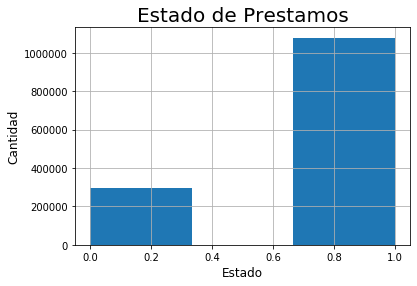

In [15]:
#Visualizamos el estado de prestamos: variable
dataset_copia['classes'].hist(bins=3)
plt.title('Estado de Prestamos', size=20);
plt.xlabel('Estado', size= 12);
plt.ylabel('Cantidad', size=12);

#En este caso se observa que hay un gran desbalance. Entonces normalizamos para obtener una mejor predicción.

## Descartamos algunas columnas específicas
Las siguientes listas ya existen incluidas en otras, así que las eliminaré
- url, id, member_id -> ya que no contienen informacion
- todas las columnas "hardship_###" -> ya que existen flags binarios)
- todas las columnas "sec_app_###" -> ya que usan solo application_type para indicar si era unico o conjunto
- toda la información de liquidación -> ya que esta es información redundante, si el préstamo no se pagó por completo, etc
- Todas las columnas con más del 70% de valores Null -> ya que no aportarán información y se perderá rigurosidad al tratar de imputar

In [16]:
dataset_copia.isnull().sum()

id                             0
member_id                1373915
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
                          ...   
settlement_date          1339707
settlement_amount        1339707
settlement_percentage    1339707
settlement_term          1339707
classes                        0
Length: 152, dtype: int64

In [17]:
dataset_copia.isnull().sum().sum()

71696981

In [18]:
dataset_copia = dataset_copia.drop(columns= ['id', 'member_id', 'url', 'policy_code'])

In [19]:
data = dataset_copia.drop(columns=['loan_status'])

In [20]:
dataset_copia = dataset_copia.drop(columns=['zip_code','sub_grade','mths_since_last_record','mths_since_last_delinq', 'mths_since_recent_bc_dlq','mths_since_recent_bc',
                          'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'mo_sin_old_il_acct',
                          'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'last_credit_pull_d'])

In [21]:
dataset_copia = dataset_copia.drop(columns=['last_pymnt_d', 'next_pymnt_d','total_bal_il', 'total_bc_limit', 'total_cu_tl',
                          'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
                          'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim', 'initial_list_status'])

In [22]:
# Con respecto al segundo punto
dataset_copia = dataset_copia.drop(columns=['debt_settlement_flag_date', 'hardship_type',
                          'hardship_reason', 'hardship_status', 
                          'hardship_amount', 'hardship_start_date',
                          'hardship_end_date', 'payment_plan_start_date', 'hardship_length',
                          'hardship_dpd', 'hardship_loan_status', 'deferral_term',
                          'orig_projected_additional_accrued_interest',
                          'hardship_payoff_balance_amount', 'hardship_last_payment_amount'])

In [23]:
# Con respecto al tercer punto
dataset_copia = dataset_copia.drop(columns=['sec_app_earliest_cr_line',
                          'revol_bal_joint','verification_status_joint', 'dti_joint', 'annual_inc_joint',
                          'sec_app_inq_last_6mths', 'sec_app_mort_acc',
                          'sec_app_open_acc', 'sec_app_revol_util','sec_app_open_act_il',
                          'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
                          'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'sec_app_fico_range_low', 'sec_app_fico_range_high' ])

In [24]:
dataset_copia = dataset_copia.drop(columns=['all_util', 'open_acc_6m', 'inq_last_12m', 'open_act_il', 
                          'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 
                          'inq_fi', 'max_bal_bc', 'mths_since_last_major_derog',
                          'il_util', 'num_tl_120dpd_2m', 'mths_since_rcnt_il'])


In [25]:
#Con respecto al 4to punto
dataset_copia= dataset_copia.drop(columns=['settlement_status', 'settlement_date',
                         'settlement_amount', 'settlement_percentage', 'settlement_term'])

## Observamos las correlaciones

In [26]:
# Hay demasiadas funciones para que un mapa de calor tenga alguna posibilidad de mostrar una cuadrícula
# y tampoco es posible realizar una interpretación de los datos
correlacion_data = dataset_copia.corr()
correlacion_data

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_il_high_credit_limit,classes
loan_amnt,1.000000,0.999556,0.998259,0.142477,0.953021,0.309873,0.032195,-0.002138,0.101643,0.101642,...,-0.021811,-0.020131,0.087934,0.020342,-0.092956,0.007817,0.334170,0.275413,0.200318,-0.072908
funded_amnt,0.999556,1.000000,0.998808,0.142571,0.953674,0.309765,0.032588,-0.001945,0.100813,0.100812,...,-0.021812,-0.020133,0.087934,0.020341,-0.092761,0.007949,0.334169,0.275413,0.200315,-0.072978
funded_amnt_inv,0.998259,0.998808,1.000000,0.142661,0.952313,0.309242,0.033657,-0.001645,0.100030,0.100029,...,-0.021826,-0.020149,0.087948,0.020290,-0.092393,0.008243,0.334197,0.275419,0.200319,-0.072597
int_rate,0.142477,0.142571,0.142661,1.000000,0.155666,-0.071362,0.146165,0.047965,-0.403169,-0.403166,...,0.026583,0.206641,-0.063701,0.248037,0.058580,0.011477,-0.118486,0.004525,-0.002747,-0.263577
installment,0.953021,0.953674,0.952313,0.155666,1.000000,0.300753,0.035986,0.007124,0.051494,0.051493,...,-0.016399,0.000162,0.070509,0.040028,-0.085199,0.014752,0.301477,0.260119,0.185541,-0.057873
annual_inc,0.309873,0.309765,0.309242,-0.071362,0.300753,1.000000,-0.139055,0.040924,0.069903,0.069904,...,0.007510,0.052413,-0.007275,-0.016370,-0.043951,0.037793,0.408800,0.315126,0.262025,0.039071
dti,0.032195,0.032588,0.033657,0.146165,0.035986,-0.139055,1.000000,-0.008023,-0.060032,-0.060035,...,-0.013967,0.068868,0.072104,0.127592,-0.016726,-0.022822,0.015190,0.223567,0.252218,-0.084895
delinq_2yrs,-0.002138,-0.001945,-0.001645,0.047965,0.007124,0.040924,-0.008023,1.000000,-0.174090,-0.174088,...,0.656164,-0.025121,-0.444748,-0.010852,-0.047360,0.011169,0.058910,0.032243,0.062321,-0.020347
fico_range_low,0.101643,0.100813,0.100030,-0.403169,0.051494,0.069903,-0.060032,-0.174090,1.000000,1.000000,...,-0.101882,-0.092465,0.300555,-0.410429,-0.202539,-0.057341,0.195576,0.031953,0.062800,0.129188
fico_range_high,0.101642,0.100812,0.100029,-0.403166,0.051493,0.069904,-0.060035,-0.174088,1.000000,1.000000,...,-0.101881,-0.092467,0.300552,-0.410426,-0.202536,-0.057341,0.195577,0.031951,0.062798,0.129186


In [27]:
dataset_copia.isnull().sum().sort_values(ascending=False)

desc                    1247945
emp_title                 88473
emp_length                80850
pct_tl_nvr_dlq            70430
avg_cur_bal               70299
                         ...   
debt_settlement_flag          0
application_type              0
hardship_flag                 0
disbursement_method           0
loan_amnt                     0
Length: 73, dtype: int64

In [28]:
dataset_copia.shape

(1373915, 73)

In [29]:
dataset_copia['title'].value_counts()

Debt consolidation                                 675757
Credit card refinancing                            254681
Home improvement                                    76832
Other                                               68683
Major purchase                                      24718
                                                    ...  
Debt Consolidation and Bedroom Furniture Needed         1
Discover no debt                                        1
kitchenremodel                                          1
Skapples LLC startup loan                               1
Condo Down Payment                                      1
Name: title, Length: 63154, dtype: int64

In [30]:
dataset_copia.isnull().sum().sort_values(ascending=False)

desc                    1247945
emp_title                 88473
emp_length                80850
pct_tl_nvr_dlq            70430
avg_cur_bal               70299
                         ...   
debt_settlement_flag          0
application_type              0
hardship_flag                 0
disbursement_method           0
loan_amnt                     0
Length: 73, dtype: int64

In [31]:
# Primer intento con 'num_actv_bc_tl' para eliminar los 70,200 valores perdidos en 17 características
dataset_copia = dataset_copia[dataset_copia['num_actv_bc_tl'].notna()]

In [32]:
dataset_copia = dataset_copia[dataset_copia['bc_util'].notna()]

In [33]:
# Elimino los valores faltantes en "emp_length" porque podría ser peor inventar 
#datos en esta sección que no reportarlos
dataset_copia = dataset_copia[dataset_copia['emp_length'].notna()]

In [34]:
#exploramos el campo "purpose"
dataset_copia['purpose'].value_counts()

debt_consolidation    710891
credit_card           270494
home_improvement       76974
other                  66793
major_purchase         25068
medical                13259
small_business         12454
car                    11741
moving                  8087
vacation                7791
house                   6283
wedding                  848
renewable_energy         747
educational                1
Name: purpose, dtype: int64

In [35]:
#filtramos "educational" debido a que solo hay un solo objeto o instancia
dataset_copia = dataset_copia[dataset_copia['purpose'] != 'educational']

In [36]:
dataset_copia.shape

(1211430, 73)

### Visualizamos el EDA (Exploratory Data Analysis)

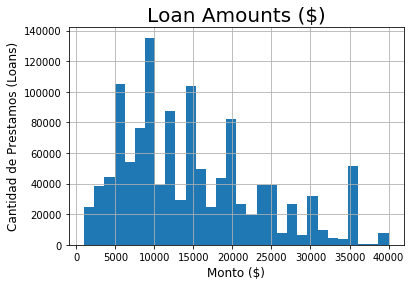

In [37]:
#Visualizamos a "loand_amnt"
dataset_copia['loan_amnt'].hist(bins=30)
plt.title('Loan Amounts ($)', size=20);
plt.xlabel('Monto ($)', size= 12);
plt.ylabel('Cantidad de Prestamos (Loans)', size=12);

- Se puede observar que hay frecuencias claramente altas, asociadas con montos de prestamos que son multiplos de 5mil. Entonces al utilizar bins, lo haremos con los siguientes rangos: 0-2500, 2500-7500, ...., 37501-42500.

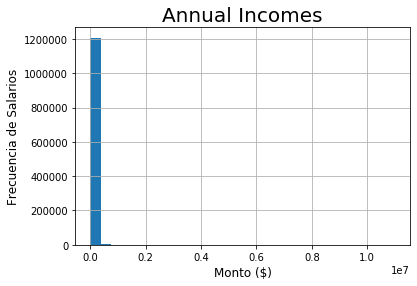

In [38]:
#Visualizamos a annual_inc
dataset_copia['annual_inc'].hist(bins=30)
plt.title('Annual Incomes', size=20);
plt.xlabel('Monto ($)', size=12);
plt.ylabel('Frecuencia de Salarios', size=12);

- En la columna annual_inc los más proobable que sucede es que hay valores outliers, esto muestra un grafico casi absurdo. Entonces tendré que investigar un poco más de lo que sucede ya que sus outliers oscilan entre 0 y 100mil.

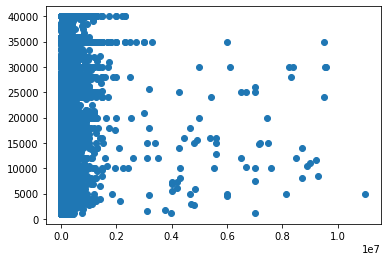

In [39]:
#Utilizamos Scatterplot para visualizar los outliers posibles y efectivamente los encontramos.
plt.scatter(dataset_copia['annual_inc'], dataset_copia['loan_amnt'])

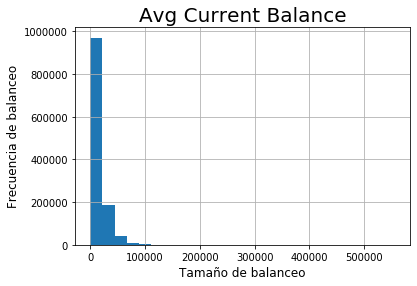

In [40]:
#Visualizamos avg_curl_bal
dataset_copia['avg_cur_bal'].hist(bins=25)
plt.title('Avg Current Balance', size = 20);
plt.xlabel('Tamaño de balanceo', size = 12);
plt.ylabel('Frecuencia de balanceo', size = 12);

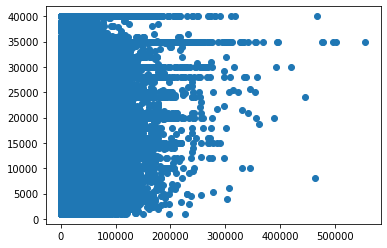

In [41]:
#Utilizamos Scatterplot para visualizar los outliers posibles y efectivamente los encontramos.
plt.scatter(dataset_copia['avg_cur_bal'], dataset_copia['loan_amnt'])

In [42]:
dataset_copia['avg_cur_bal'].describe()

count    1.211430e+06
mean     1.357119e+04
std      1.611179e+04
min      0.000000e+00
25%      3.185000e+03
50%      7.554000e+03
75%      1.885100e+04
max      5.559250e+05
Name: avg_cur_bal, dtype: float64

- En el grafico de arriba se muestran los outliers. Entonces se debe limitar a una cierta cantidad, segun la imagen, para manejar estos outliers. Ya que, por ejemplo, se puede observar en la estadistica descriptiva un gran salto del 75% al máximo, lo que se puede traducir como valores atípicos, donde una razón más es que la media también oscila por el 75%

## Limpieza de datos para lidiar con Outliers
- Se visualizará la limpieza de datos atípicos en las siguientes variables
- - annual_inc
- - avg_cur_bal

In [43]:
#Se limitará el ingreso anual a 300mil aprox para representar una mejor distribucion (normal, sin valores atipicos)
Non_outliers_data = dataset_copia[dataset_copia['annual_inc'] <= 250_000 ]

In [44]:
#Se limitará los ingresos anuales de 1mil, pues no son datos confiables.
Non_outliers_data = Non_outliers_data[Non_outliers_data['annual_inc']> 500]

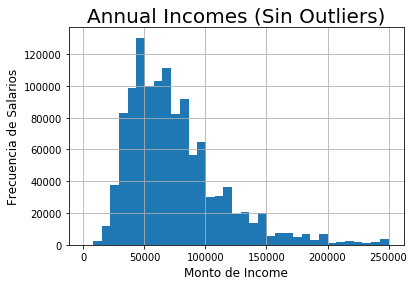

In [45]:
#Visualizamos annual_inc
Non_outliers_data['annual_inc'].hist(bins=35)
plt.title('Annual Incomes (Sin Outliers)', size=20);
plt.xlabel( 'Monto de Income', size=12);
plt.ylabel('Frecuencia de Salarios', size=12);

In [46]:
Non_outliers_data = Non_outliers_data[Non_outliers_data['avg_cur_bal'] < 60_000]

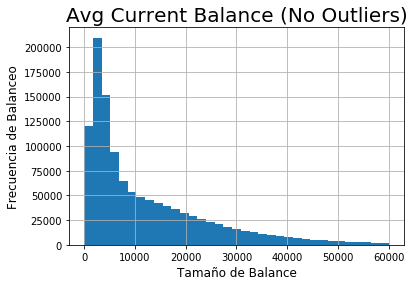

In [47]:
Non_outliers_data['avg_cur_bal'].hist(bins=35)
plt.title('Avg Current Balance (No Outliers)', size = 20);
plt.xlabel('Tamaño de Balance', size = 12);
plt.ylabel('Frecuencia de Balanceo', size = 12);

## Campos categoricos:
- Muchas columnas estan basadas en datos categoricos (textos), donde se requiere más investigacion para determinar como manipularlas y se conviertan en datos utiles, por lo que necesitmoa encontrar una manera de convertirlas en datos numéricos.

In [48]:
dataset_copia['emp_title'].value_counts()

Teacher                              21355
Manager                              19772
Owner                                10641
Registered Nurse                      8885
RN                                    8585
                                     ...  
Retail Sales consultant                  1
aircraft maintenance engineer            1
MASTER DIVER                             1
Tasca                                    1
Management Development Specialist        1
Name: emp_title, Length: 341751, dtype: int64

In [49]:
dataset_copia['title'].value_counts()

Debt consolidation         628293
Credit card refinancing    237167
Home improvement            69634
Other                       61647
Major purchase              22770
                            ...  
CREDITCARDDEBT                  1
december2012                    1
persoanl                        1
Looking Ahead                   1
Merry Christmas to us           1
Name: title, Length: 37177, dtype: int64

In [50]:
dataset_copia['desc'].value_counts()

                                                                                                                                                                                                                                                 23
  Borrower added on 03/17/14 > Debt consolidation<br>                                                                                                                                                                                            10
  Borrower added on 03/10/14 > Debt consolidation<br>                                                                                                                                                                                            10
  Borrower added on 01/29/14 > Debt consolidation<br>                                                                                                                                                                                             8
  Borrower added on 01/1

- Se encontraron 341751 valores unicos en "emp_title", 37177 para "title" y 73999 en "desc", en los cuales va a ser muy dificil de abordarlos directamente. En este caso se podría aplicar **Natural Language Processing** para reducir la complejidad, pero se volvería más engorroso.
- En este caso, esas 3 variables, la mediré, agregaré 3 columnas más y las juntaré en una sola variable "all_text" parar que sea más manejable.

### Realizamos una limpieza adicional

In [51]:
#Funcion para automatizar la eliminación de filas que contienen NaNs en columnas que tienen NaNs menores a 2000
def drop_na(df):
    columnas=dataset_copia.columns
    subconj=[]
    for columna in columnas:
        #Chekearmos los valores perdidos
        valores_perdidos = df[columna].isnull().sum()
        #Menos a 2mil NaNs, elimina dichas filas
        if valores_perdidos <= 2000:
            subconj.append(columna)            
        df.dropna(subset=subconj,inplace=True)
        print(f'Chekeo de columna finalizada  "{columna}"')
    print('Inspeccion total Finalizada')
drop_na(dataset_copia)

Chekeo de columna finalizada  "loan_amnt"
Chekeo de columna finalizada  "funded_amnt"
Chekeo de columna finalizada  "funded_amnt_inv"
Chekeo de columna finalizada  "term"
Chekeo de columna finalizada  "int_rate"
Chekeo de columna finalizada  "installment"
Chekeo de columna finalizada  "grade"
Chekeo de columna finalizada  "emp_title"
Chekeo de columna finalizada  "emp_length"
Chekeo de columna finalizada  "home_ownership"
Chekeo de columna finalizada  "annual_inc"
Chekeo de columna finalizada  "verification_status"
Chekeo de columna finalizada  "issue_d"
Chekeo de columna finalizada  "loan_status"
Chekeo de columna finalizada  "pymnt_plan"
Chekeo de columna finalizada  "desc"
Chekeo de columna finalizada  "purpose"
Chekeo de columna finalizada  "title"
Chekeo de columna finalizada  "addr_state"
Chekeo de columna finalizada  "dti"
Chekeo de columna finalizada  "delinq_2yrs"
Chekeo de columna finalizada  "earliest_cr_line"
Chekeo de columna finalizada  "fico_range_low"
Chekeo de columna 

In [52]:
dataset_copia.isnull().sum().sort_values(ascending=False)

desc                     1135844
title                      14533
emp_title                   5806
pub_rec                        0
delinq_2yrs                    0
                          ...   
mort_acc                       0
num_accts_ever_120_pd          0
num_actv_bc_tl                 0
num_actv_rev_tl                0
loan_amnt                      0
Length: 73, dtype: int64

In [53]:
dataset_copia['emp_title'].fillna(" . ", inplace= True)

In [54]:
dataset_copia['title'].fillna(" . ", inplace= True)

In [55]:
dataset_copia['desc'].fillna(" . ", inplace= True)

In [56]:
dataset_copia.shape

(1210906, 73)

## Revisamos los tipos de datos

In [57]:
dataset_copia.dtypes.value_counts()

float64    54
object     18
int64       1
dtype: int64

In [58]:
columna_objetivo = dataset_copia.select_dtypes(include='object').columns
columna_objetivo

Index(['term', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'desc',
       'purpose', 'title', 'addr_state', 'earliest_cr_line',
       'application_type', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')

-Para las fechas en mi modelo, convertiré "issue_d" y "earliest_cr_line" a DateTime y luego generaré una nueva colunma con la diferencia de estas.

In [59]:
dataset_copia['issue_d'].head()

0    Dec-2015
1    Dec-2015
2    Dec-2015
4    Dec-2015
5    Dec-2015
Name: issue_d, dtype: object

In [60]:
dataset_copia['issue_d'] = pd.to_datetime(dataset_copia['issue_d'])

In [61]:
dataset_copia['earliest_cr_line'].head()

0    Aug-2003
1    Dec-1999
2    Aug-2000
4    Jun-1998
5    Oct-1987
Name: earliest_cr_line, dtype: object

In [62]:
dataset_copia['earliest_cr_line'] = pd.to_datetime(dataset_copia['earliest_cr_line'])

In [63]:
#Tomamos esas 2 columnas para la longitud del historial crediticio
dataset_copia['credit_length_days'] = dataset_copia['issue_d'] - dataset_copia['earliest_cr_line']

In [64]:
#Extraemos solo los días del formato de fecha y hora
dataset_copia['credit_length_days'] = dataset_copia['credit_length_days'].dt.days

In [65]:
#Verificamos la salida
dataset_copia['credit_length_days'].head()

0     4505
1     5844
2     5600
4     6392
5    10288
Name: credit_length_days, dtype: int64

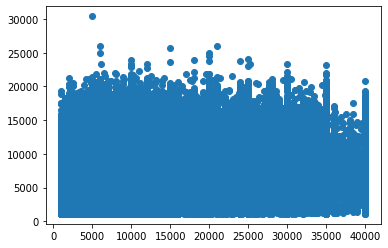

In [66]:
plt.scatter(dataset_copia['loan_amnt'], dataset_copia['credit_length_days'])

In [67]:
dataset_copia['credit_length_days'].min()

1096

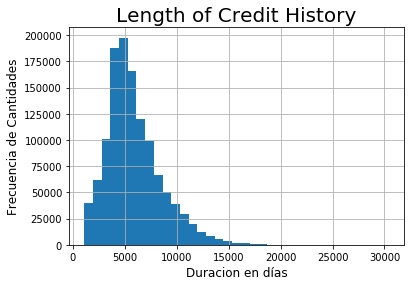

In [68]:
dataset_copia['credit_length_days'].hist(bins=35)
plt.title(('Length of Credit History'), size = 20);
plt.xlabel('Duracion en días', size = 12);
plt.ylabel('Frecuencia de Cantidades', size = 12);

In [69]:
dataset_copia['credit_length_days'].mean()

5868.0097472471025

In [70]:
dataset_copia['annual_inc'].mean()

78467.85838115441

In [71]:
dataset_copia.drop(columns=['issue_d', 'earliest_cr_line'], inplace=True)

- En la celda anterior se puede observar que necesitamos eliminar "dias" de cada informacion para convertirla en un dato que sea facil de interpretar por los modelos de clasificacion.

In [72]:
dataset_copia.isnull().sum().sort_values(ascending=False)

credit_length_days    0
classes               0
delinq_2yrs           0
fico_range_low        0
fico_range_high       0
                     ..
num_actv_bc_tl        0
num_actv_rev_tl       0
num_bc_sats           0
num_bc_tl             0
loan_amnt             0
Length: 72, dtype: int64

In [73]:
dataset_copia['fico_range_high'].max()

850.0

In [74]:
dataset_copia['fico_range_low'].min()

660.0

### Ahora tenemos algo limpio el dataset, pero en el Feature Engineering continuaremos con algunos EDAs posibles

In [75]:
#Guardamos el Dataset limpio hasta este momento -> Primera parte
dataset_copia.to_csv('./Cleaned_dataset_Part1.csv', index=False)

# ------------------ PROCESO 2: FEATURE ENGINEERING --------------------------

In [76]:
#Relizamos la lectura del dataset anterior
Data_Cleaned_1 = pd.read_csv('./Cleaned_dataset_Part1.csv')

In [77]:
dataset_copia2 = Data_Cleaned_1

In [78]:
dataset_copia2.dtypes.value_counts()

float64    54
object     16
int64       2
dtype: int64

- Con muchos objetos presentes, tendremos que considerar multiples opciones para manipular los tipos de datos. Lo más probable a usar es One-Hot-Encoding

In [79]:
columna_objeto = dataset_copia2.select_dtypes(include='object').columns
columna_objeto

Index(['term', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan', 'desc', 'purpose',
       'title', 'addr_state', 'application_type', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

- Los siguiente se binarizará: term, verification_status, pyment_plan, application_type, hardship_flag, disbursement_method  y debt_settlement_flag.

- Los siguientes se codificaran en un solo uso: home_ownership, purpose y addr_state.

- Los siguientes se codificaran con un rango: emp_length y grade.

- Para un posterior trabajo con NLP se combinarán con desc, emp_title y title. Mientras tanto se mediran sus longitudes.

- Las columnas de texto issue_d y earliest_cr_line se convertiran en un formato DateTime, luego se crearán con una nueva columna a partir de su diferencia.

In [80]:
dataset_copia2.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'pymnt_plan',
       'desc', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mort_acc', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',

### Funciones enviadas por el usuario
### Se construye una nueva columna para los dataText

In [81]:
long_descuento = []
[long_descuento.append(len(i)) for i in dataset_copia2.desc]
dataset_copia2["desc_length"]= long_descuento

In [82]:
dataset_copia2['desc_length'].head()

0    3
1    3
2    3
3    3
4    3
Name: desc_length, dtype: int64

#### Medimos las longitudes de cada texto y lo devolvemos con una nueva columna

In [83]:
dataset_copia2['all_text'] = dataset_copia2['desc'] + " " + dataset_copia2['emp_title'] + " " + dataset_copia2['title']

In [84]:
dataset_copia2['all_text'].head()

0                  .  leadman Debt consolidation
1                           .  Engineer Business
2                            .  truck driver  . 
3          .  Contract Specialist Major purchase
4     .  Veterinary Tecnician Debt consolidation
Name: all_text, dtype: object

In [85]:
long_total_text = [len(i) for i in dataset_copia2['all_text']]
dataset_copia2["all_text_length"] = long_total_text

In [86]:
dataset_copia2['all_text_length'].value_counts()

38      60580
30      57492
39      56927
37      55074
35      51277
        ...  
746         1
747         1
748         1
750         1
1024        1
Name: all_text_length, Length: 973, dtype: int64

In [87]:
dataset_copia2.emp_title.head()

0                 leadman
1                Engineer
2            truck driver
3     Contract Specialist
4    Veterinary Tecnician
Name: emp_title, dtype: object

In [88]:
long_descuento = [len(i) for i in dataset_copia2.desc]
dataset_copia2["desc_length"]= long_descuento

## --------------------------------------------------
long_emp_title = [len(i) for i in dataset_copia2.emp_title]
dataset_copia2["emp_title_length"] = long_emp_title

## --------------------------------------------------
long_title = [len(i) for i in dataset_copia2.title]   
dataset_copia2["title_length"] = long_title

### Clasificaciones ordinales

In [89]:
#Construimos un diccionario de valores para identificar y reemplazar el grado - G:1 a A:7
long_dicc = {'A':7,
               'B': 6,               
               'C': 5,
               'D': 4,
               'E': 3,
               'F': 2,
               'G': 1,}
dataset_copia2['grade'].replace(long_dicc, inplace=True)
## --------------------------------------------------

dataset_copia2['grade'].head()

0    5
1    5
2    6
3    2
4    5
Name: grade, dtype: int64

- Convertimos las cadenas del empleo en numeros representativos. Primero convertimos menos de 1 año en 0 y más de 10 años en 10, solo con fines de identidicar.

In [90]:
#Construimos un diccionario de valores para identificar y reemplazar de manera conveniente
long_dicc = {'10+ years':10,
        '2 years': 2,
        '< 1 year': 0,
        '3 years': 3,
        '1 year': 1,
        '5 years': 5,
        '4 years': 4,
        '6 years': 6,
        '8 years': 8,
        '7 years': 7,
        '9 years': 9}
dataset_copia2['emp_length'].replace(long_dicc, inplace=True)

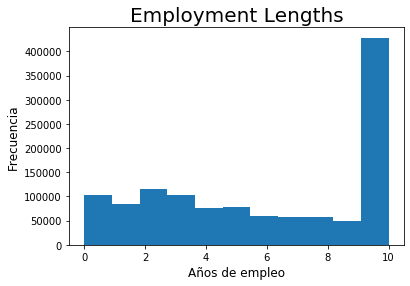

In [91]:
plt.hist(dataset_copia2['emp_length'], bins=11)
plt.title('Employment Lengths', size=20);
plt.xlabel('Años de empleo', size=12);
plt.ylabel('Frecuencia', size=12);

In [92]:
dataset_copia2['emp_length'].value_counts(normalize=True)

10    0.353633
2     0.095727
3     0.084659
0     0.084487
1     0.069488
5     0.065368
4     0.062566
6     0.048762
8     0.048173
7     0.046742
9     0.040395
Name: emp_length, dtype: float64

In [93]:
dataset_copia2['emp_length'].mean()

5.997059226727756

In [94]:
#Encontramos la duracion media del empleo de las personas cuyos prestamos tuvieron éxito o no.
dataset_copia2.groupby(by='classes')['emp_length'].mean()

classes
0    5.860851
1    6.033932
Name: emp_length, dtype: float64

### Realizamos el One-Hot-Encoding en las siguientes variables:
- purpose
- verification_status
- addr_state
- pymnt_plan
- initial_list_status
- application_type
- hardship_flag
- disbursement_method
- debt_settlement_flag

In [95]:
len(dataset_copia2.columns)

77

In [97]:
# Vemos todas las columnas de objetos restantes
columna_objeto

Index(['term', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan', 'desc', 'purpose',
       'title', 'addr_state', 'application_type', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

In [98]:
dataset_copia2['term'].head()

0     36 months
1     36 months
2     60 months
3     60 months
4     36 months
Name: term, dtype: object

### contamos los datos en purpose

In [99]:
dataset_copia2['purpose'].value_counts()

debt_consolidation    710586
credit_card           270419
home_improvement       76917
other                  66739
major_purchase         25060
medical                13252
small_business         12448
car                    11737
moving                  8085
vacation                7788
house                   6281
wedding                  848
renewable_energy         746
Name: purpose, dtype: int64

In [100]:
dataset_copia2.groupby(by='classes')['purpose'].value_counts(normalize= True)

classes  purpose           
0        debt_consolidation    0.617561
         credit_card           0.188380
         other                 0.059608
         home_improvement      0.057523
         major_purchase        0.020580
         small_business        0.015711
         medical               0.011843
         moving                0.007896
         car                   0.007400
         vacation              0.006299
         house                 0.005974
         renewable_energy      0.000744
         wedding               0.000481
1        debt_consolidation    0.578500
         credit_card           0.232778
         home_improvement      0.065144
         other                 0.053899
         major_purchase        0.020726
         medical               0.010701
         car                   0.010313
         small_business        0.008810
         vacation              0.006467
         moving                0.006347
         house                 0.004974
         wed

In [101]:
One_Hot_Enc = ['purpose', 'term',
'verification_status',
'pymnt_plan',
'application_type',
'hardship_flag', 'addr_state',
'disbursement_method', 
'debt_settlement_flag', 'home_ownership']

In [102]:
dataset_copia2 = pd.get_dummies(data= dataset_copia2, columns = One_Hot_Enc, drop_first=True)

In [103]:
dataset_copia2.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'emp_title', 'emp_length', 'annual_inc',
       'loan_status',
       ...
       'addr_state_WI', 'addr_state_WV', 'addr_state_WY',
       'disbursement_method_DirectPay', 'debt_settlement_flag_Y',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT'],
      dtype='object', length=142)

In [104]:
len(dataset_copia2.columns)

142

### Interacción entre características
- Realizaremos las Correlaciones

In [105]:
Correl_Data = dataset_copia2.corr(method='pearson')
Correl_Data = Correl_Data[abs(Correl_Data) >= 0.8].stack().reset_index()
Correl_Data = Correl_Data[Correl_Data['level_0'].astype(str)!=Correl_Data['level_1'].astype(str)]

# -----------------------------------------------------------------------------------------
#Filtramos valores duplicados superiores e inferiores
Correl_Data['ordered-cols'] = Correl_Data.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
Correl_Data = Correl_Data.drop_duplicates(['ordered-cols'])
Correl_Data.drop(['ordered-cols'], axis=1, inplace=True)

# -----------------------------------------------------------------------------------------
Correl_Data = pd.DataFrame(Correl_Data)
Correl_Data.columns=['Initial', 'Secondary', 'Corr_Values']
#Tomamos el valor absoluto de los valores Corr_Values
Correl_Data['Abs_Corr_Values'] = abs(Correl_Data['Corr_Values'])

# -----------------------------------------------------------------------------------------
Correl_Data = Correl_Data.sort_values(by= 'Abs_Corr_Values', ascending = False)
Correl_Data = Correl_Data.iloc[6:]
Correl_Data

,Initial,Secondary,Corr_Values,Abs_Corr_Values
109,desc_length,all_text_length,0.984275,0.984275
74,num_actv_rev_tl,num_rev_tl_bal_gt_0,0.981772,0.981772
55,tot_cur_bal,tot_hi_cred_lim,0.976269,0.976269
42,recoveries,collection_recovery_fee,0.975954,0.975954
13,int_rate,grade,-0.954909,0.954909
7,funded_amnt,installment,0.952267,0.952267
3,loan_amnt,installment,0.952266,0.952266
11,funded_amnt_inv,installment,0.952221,0.952221
103,total_bal_ex_mort,total_il_high_credit_limit,0.874174,0.874174
130,pymnt_plan_y,hardship_flag_Y,0.870393,0.870393


In [106]:
for i,j in zip(Correl_Data['Initial'], Correl_Data['Secondary']):
    nombre = i + '*' + j  
    dataset_copia2[nombre] = dataset_copia2[i] * dataset_copia2[j]
    print(nombre)

desc_length*all_text_length
num_actv_rev_tl*num_rev_tl_bal_gt_0
tot_cur_bal*tot_hi_cred_lim
recoveries*collection_recovery_fee
int_rate*grade
funded_amnt*installment
loan_amnt*installment
funded_amnt_inv*installment
total_bal_ex_mort*total_il_high_credit_limit
pymnt_plan_y*hardship_flag_Y
revol_util*bc_util
bc_util*percent_bc_gt_75
tot_cur_bal*avg_cur_bal
num_bc_tl*num_rev_accts
last_fico_range_high*last_fico_range_low
open_acc*num_op_rev_tl
num_op_rev_tl*num_sats
num_actv_bc_tl*num_bc_sats
home_ownership_MORTGAGE*home_ownership_RENT
num_actv_bc_tl*num_actv_rev_tl
avg_cur_bal*tot_hi_cred_lim
num_actv_bc_tl*num_rev_tl_bal_gt_0


In [107]:
#Todos los valores en esta columna son ceros, ya que no se superponen
dataset_copia2.drop(columns = ['home_ownership_MORTGAGE*home_ownership_RENT', 'funded_amnt', 'funded_amnt_inv'], inplace= True)

In [108]:
len(dataset_copia2.columns)

161

In [109]:
dataset_copia2.head()

,loan_amnt,int_rate,installment,grade,emp_title,emp_length,annual_inc,loan_status,desc,title,...,bc_util*percent_bc_gt_75,tot_cur_bal*avg_cur_bal,num_bc_tl*num_rev_accts,last_fico_range_high*last_fico_range_low,open_acc*num_op_rev_tl,num_op_rev_tl*num_sats,num_actv_bc_tl*num_bc_sats,num_actv_bc_tl*num_actv_rev_tl,avg_cur_bal*tot_hi_cred_lim,num_actv_bc_tl*num_rev_tl_bal_gt_0
0,3600.0,13.99,123.03,5,leadman,10,55000.0,Fully Paid,.,Debt consolidation,...,0.00,2.999658e+09,45.0,315840.0,28.0,28.0,4.0,8.0,3.685813e+09,8.0
1,24700.0,11.99,820.28,5,Engineer,10,65000.0,Fully Paid,.,Business,...,208.67,1.989386e+09,459.0,485805.0,440.0,440.0,65.0,25.0,3.056327e+09,25.0
2,20000.0,10.78,432.66,6,truck driver,10,63000.0,Fully Paid,.,.,...,2795.00,5.997713e+09,28.0,492800.0,24.0,24.0,4.0,6.0,6.905722e+09,6.0
3,10400.0,22.45,289.91,2,Contract Specialist,3,104433.0,Fully Paid,.,Major purchase,...,4650.00,9.170344e+09,171.0,492800.0,84.0,84.0,20.0,24.0,1.215147e+10,24.0
4,11950.0,13.44,405.18,5,Veterinary Tecnician,4,34000.0,Fully Paid,.,Debt consolidation,...,9100.00,3.276288e+07,8.0,573045.0,20.0,20.0,4.0,6.0,4.326400e+07,6.0


In [110]:
dataset_copia2.shape

(1210906, 161)

In [111]:
dataset_copia2.to_csv('./Total_Cleaned_Data_for_Data_Modeling.csv', index=False)

##-----------------------------------------------------------------
#Ahora daremos paso al Data Modeling en el Notebook 3